## Sample of comments analysis based on external data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

df = pd.read_csv("telesales calls.csv", sep = ";")

In [4]:
df.head()


,cardcode,calldate,Result,ShortComment,LongComment,Found,Interest
0,A.06446,4/9/2019,Παραγγελία,Επανάκληση,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,A.01775,4/9/2019,Ενημέρωση,Αντιπρόσωπος μόνο,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,A.03996,4/9/2019,Ενημέρωση,Αντιπρόσωπος μόνο,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,A.04698,4/9/2019,Ενημέρωση,Ανταγωνισμός,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,A.01653,4/9/2019,Ενημέρωση,Κατάλογος προϊόντων,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0


In [5]:
df.columns

Index(['cardcode', 'calldate', 'Result', 'ShortComment', 'LongComment',
       'Found', 'Interest'],
      dtype='object')

* Drop columns that are not necessary for our model

In [6]:
fill_df = df[['LongComment',"Found",'Interest']]
print(fill_df.shape)
fill_df.head()

(3346, 3)


,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0


* We keep only the records where the customer was found

In [7]:
df_found = fill_df[(fill_df["Found"] == 1.0)]

In [8]:
df_found.head()

,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0


* Remove the calls that had neutral result

In [9]:
df_interest = df_found[(df_found["Interest"] == 1.0)|(df_found["Interest"] == -1.0) ]

In [10]:
df_interest.head()

,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
17,ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903,1.0,-1.0
18,ΘΑ ΠΑΡΕΙ ΤΗΛ ΑΝ ΧΡΕΙΣΤΕΙ ΚΑΤΙ ΑΠΟ ΤΗΝ ΕΤΑΙΡΕΙΑ...,1.0,-1.0
19,ΣΥΝΕΡΓΑΖΟΤΑΝ ΠΑΛΙΑ ΜΑΖΙ ΜΑΣ ΨΩΝΙΖΕΙ ΜΟΝΟ ΑΠΟ Α...,1.0,-1.0
22,"ΧΟΝΔΡΙΚΗ ΠΩΛΗΣΗ ΠΑΓΩΤΩΜΗΧΑΝΩΝ,",1.0,1.0


In [11]:
label = {1.0: 'pos', -1.0: 'neg'}
df_final = df_interest.copy()
df_final['Interest'].replace(label, inplace = True)

In [12]:
fill_df = df[['LongComment',"Found",'Interest']]
print(fill_df.shape)
fill_df.head(5)

(3346, 3)


,LongComment,Found,Interest
0,ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕ...,1.0,1.0
1,ΘΕΛΕΙ ΚΑΤΑΛΟΛΟ ΜΕ ΤΑ ΠΡΟΙΟΝΤΑ ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥ...,1.0,0.0
2,ΨΩΝΙΖΕΙ ΑΠΟ ΝΟΥΣΗ ΧΡΗΣΤΟ ΚΑΙ ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛ...,1.0,0.0
3,ΨΩΝΙΖΕΙ ΑΠΟ ΖΑΦΕΙΡΑΤΟ ΚΑΙ ΔΟΥΛΕΥΕΙ ΤΟ MAMAS CA...,1.0,0.0
4,ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ ΨΩΜΙ oLIKIS ΜΕ ΠΡΟΖΥΜΙ ΠΑΙΡΝΕ...,1.0,0.0


In [13]:
df_final["Interest"].value_counts()

neg    570
pos    207
Name: Interest, dtype: int64

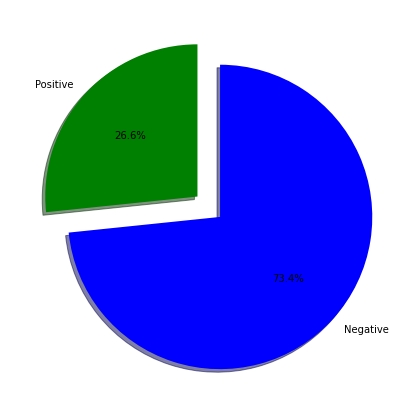

In [14]:
fig=plt.figure(figsize=(7,7))
colors=["green",'blue']
pos=df_final[df_final['Interest']== 'pos']
neg=df_final[df_final['Interest']== 'neg']
ck=[pos['Interest'].count(),neg['Interest'].count()]
legpie=plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%', 
                 shadow = True,
                 colors = colors,
                 startangle = 90,
                 explode=(0, 0.2))

* Negative reactions are the majority. This is expected since the specific datasets contains records from calls to old customers or to firms which are of unknown condtion

In [15]:
react = df_final.LongComment.values.astype("str")
react

array(['ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΕΝΑ MAMAS CAKE λΕΥΚΟ ΚΑΙ ΘΕΛΕΙ ΔΕΙΓΜΑ ΓΙΑ CHOCOLATIER DELICECOVER SOKOLATA,',
       'ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903',
       'ΘΑ ΠΑΡΕΙ ΤΗΛ ΑΝ ΧΡΕΙΣΤΕΙ ΚΑΤΙ ΑΠΟ ΤΗΝ ΕΤΑΙΡΕΙΑ....',
       'ΣΥΝΕΡΓΑΖΟΤΑΝ ΠΑΛΙΑ ΜΑΖΙ ΜΑΣ ΨΩΝΙΖΕΙ ΜΟΝΟ ΑΠΟ ΑΝΤΑΓΩΝΙΣΤΗ,ΠΡΟΣ ΤΟ ΠΑΡΟΝ ΔΕΝ ΘΕΛΕΙ  ΣΥΝΕΡΓΑΣΙΑ.',
       'ΧΟΝΔΡΙΚΗ ΠΩΛΗΣΗ ΠΑΓΩΤΩΜΗΧΑΝΩΝ,',
       'δεν ψωνιζει προοιντα απο την εταιρεια  εχει σταματησει και παιρνει μονο απο ανταγωνιστες.(ΜΠΕΞΗΣ)',
       'ΘΑ ΔΩΣΕΙ Ο ΙΔΙΟΣ ΠΑΡΑΓΓΕΛΙΑ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ.',
       'ΘΑ ΔΩΣΕΙ ΠΑΡΑΓΓΕΛΙΑ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΑΣΤΕΙ  ΕΙΝΑΙ ΕΝΗΜΕΡΩΜΕΝΟΣ ΓΙΑ ΤΑ ΠΡΟΙΟΝΤΑ ΜΑΣ.',
       'Ο ΠΕΛΑΤΗΣ ΕΝΗΜΕΡΩΘΗΚΕ ΓΙΑ ΝΕΑ ΠΡΟΙΟΝΤΑ ΕΔΩΣΕ ΠΑΡΑΓΓΕΛΙΑ ΓΙΑ ΠΡΩΤΗ ΦΟΡΑ ΜΙΑ mINUTA ΚΑΙ ΖΗΤΗΣΕ ΔΕΙΓΜΑ ΚΑΙ mATCHA TEA ',
       'ΠΑΡΑΓΓΕΛΙΑ ΜΙΑ mINUTA',
       'παιρνει συγκεκριμενα προιοντα και αν χρειαστει κατι θα μας ενημερωσει,',
       'ΔΕΝ ΕΝΔΙΑΦΕΡΕΤΑΙ,',
       'ΠΑΙΡΝΕΙ ΣΥΓΚΕΚΡΙΜΕΝΑ ΠΡΟΙΟΝΤΑ ΚΑΙ ΔΙΝΕΙ ΠΑΡΑΓΓΕΛΙΑ ΟΤΑΝ ΧΡΕΙΑΖΕΤΑΙ,',
       'ΕΝΗΜΕΡΩΩΝΕΤΑΙ ΑΠΟ ΤΟΝ Κ

* Factorize the sentiment_value with 0 for pos and 1 for negative reaction

In [16]:
sentiment_label = df_final.Interest.factorize()
sentiment_label

(array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 

* We run Tokenizer to split and number individual words

In [17]:
#react = df_final.LongComment.values
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(react)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(react)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [18]:
tokenizer

In [19]:
print(tokenizer.word_index)

{'παραγγελια': 1, 'δεν': 2, 'ενδιαφερεται': 3, 'για': 4, 'θα': 5, 'εδωσε': 6, 'χρειαστει': 7, 'οκ': 8, 'nan': 9, 'δωσει': 10, 'στον': 11, 'ο': 12, 'κατι': 13, 'ιδιος': 14, 'απο': 15, 'αν': 16, 'εμπορο': 17, 'οταν': 18, 'και': 19, 'μας': 20, 'δινει': 21, 'τα': 22, 'πωλητη': 23, 'μονο': 24, 'προιοντα': 25, 'ψωνιζει': 26, 'τον': 27, 'ενδιαφερται': 28, 'χρειαζεται': 29, 'την': 30, 'το': 31, 'εχει': 32, 'με': 33, 'να': 34, 'παιρνει': 35, 'προς': 36, 'ειναι': 37, 'θελει': 38, 'εβδομαδα': 39, 'δενε': 40, 'ενημερωνεται': 41, '1': 42, 'ok': 43, 'ενημερωμενος': 44, 'νουση': 45, 'πυρρο': 46, 'mamas': 47, 'εταιρεια': 48, 'κειμπινο': 49, 'τωρα': 50, 'παρων': 51, 'αυτη': 52, 'δουλεια': 53, 'ενα': 54, 'καλεσει': 55, 'παρον': 56, 'εκεινον': 57, 'ενδιαφερονται': 58, 'η': 59, 'αργοτερα': 60, 'παρει': 61, 'χρειστει': 62, 'μιλαει': 63, 'του': 64, 'αλλη': 65, 'δειγμα': 66, 'chocolatier': 67, 'delicecover': 68, 'τηλ': 69, 'αντωνιου': 70, 'αλλα': 71, 'στην': 72, 'βουδρη': 73, 'μανο': 74, 'καταλογο': 75, 'ιδι

In [20]:
print(react[1])
print(encoded_docs[1])

ΘΑ ΚΑΛΕΣΕΙ Ο ΙΔΙΟΣ ΟΤΑΝ ΧΡΕΙΑΣΤΕΙ ΚΑΤΙ 2105621903
[5, 55, 12, 14, 18, 7, 13, 177]


In [21]:
print(padded_sequence[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   5  55  12  14  18   7
  13 177]


**Set up and train a NN model to predict sentiment**

In [22]:
embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 32)           15264     
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 200, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 50)                16600     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 31,915
Trainable params: 31,915
Non-trainable params: 0
_________________________________________________________________
None


In [23]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs= 5, batch_size=32)

Epoch 1/5
20/20 [==============================] - 4s 99ms/step - loss: 0.6431 - accuracy: 0.7118 - val_loss: 0.5471 - val_accuracy: 0.7692
Epoch 2/5
20/20 [==============================] - 2s 83ms/step - loss: 0.5939 - accuracy: 0.7246 - val_loss: 0.5242 - val_accuracy: 0.7692
Epoch 3/5
20/20 [==============================] - 2s 84ms/step - loss: 0.5478 - accuracy: 0.7246 - val_loss: 0.4816 - val_accuracy: 0.7692
Epoch 4/5
20/20 [==============================] - 2s 83ms/step - loss: 0.4764 - accuracy: 0.7279 - val_loss: 0.3860 - val_accuracy: 0.7692
Epoch 5/5
20/20 [==============================] - 2s 83ms/step - loss: 0.3417 - accuracy: 0.8390 - val_loss: 0.2762 - val_accuracy: 0.9167


- Accuracy of the model is extremely high. This does not mean that this is a good model since the dataset is of small size

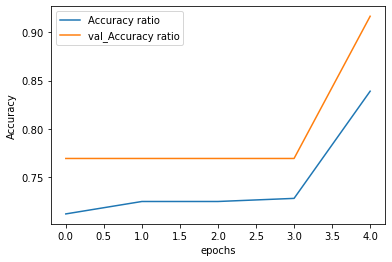

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(history.history['accuracy'], label='Accuracy ratio')
plt.plot(history.history['val_accuracy'], label='val_Accuracy ratio')
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.savefig("Accuracy_plot.png")

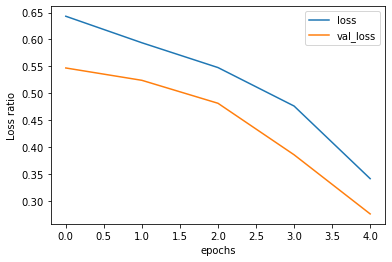

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("epochs")
plt.ylabel("Loss ratio")
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

* Build a function to check performance of the model in common phrases

In [48]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [50]:
test_sentence1 = "εδωσε παραγγελια"
predict_sentiment(test_sentence1)

test_sentence2 = "δεν ενδιαφερεται αμεσα"
predict_sentiment(test_sentence2)

Predicted label:  pos
Predicted label:  neg


### Bulid model to investigate for the existence of overffiting

In [26]:
from imblearn.under_sampling import NearMiss

# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)
# transform the dataset
X, y = undersample.fit_resample(padded_sequence, sentiment_label[0])

In [52]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
Note: you may need to restart the kernel to use updated packages.


* we build the model again , now with the contribution of NearMiss

In [27]:
import keras

early_stopping = keras.callbacks.EarlyStopping(
    patience=3,
    min_delta=0.1,
    restore_best_weights=True,
)

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 32)           15264     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 200, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 31,915
Trainable params: 31,915
Non-trainable params: 0
_________________________________________________________________
None


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=4)
history = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=[early_stopping]) ##early_stopping "ανιχνεύει" το overfitting

Epoch 1/20
8/8 [==============================] - 3s 114ms/step - loss: 0.6899 - accuracy: 0.5847 - val_loss: 0.6878 - val_accuracy: 0.5806
Epoch 2/20
8/8 [==============================] - 1s 80ms/step - loss: 0.6813 - accuracy: 0.6048 - val_loss: 0.6845 - val_accuracy: 0.4355
Epoch 3/20
8/8 [==============================] - 1s 80ms/step - loss: 0.6677 - accuracy: 0.5806 - val_loss: 0.6720 - val_accuracy: 0.5161
Epoch 4/20
8/8 [==============================] - 1s 80ms/step - loss: 0.6491 - accuracy: 0.6290 - val_loss: 0.6549 - val_accuracy: 0.5645


In [29]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print(accuracy) ## actual accuracy

0.6442307829856873


In [30]:
predictions = model.predict(X_test) > 0.5
predictions = predictions.astype(int)
df_new = pd.DataFrame(predictions, columns=['Prediction'])
df_new['Actual'] = y_test
df_new

,Prediction,Actual
0,1,1
1,1,1
2,1,0
3,1,0
4,1,1
...,...,...
99,0,0
100,1,0
101,1,0
102,1,0


### Translate comments to English 

In [ ]:
pip uninstall googletrans


In [2]:
pip install googletrans 

  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15739 sha256=fd16222163de8a0c429d0aeb5e4295b7d66dcf8cfca2ee9b911c500fd0d35ab8
  Stored in directory: c:\users\netadmin\appdata\local\pip\cache\wheels\0e\ce\9b\d51de1064911d42480ab6b57fc943ee36572441f27546354e2
Successfully built googletrans
Note: you may need to restart the kernel to use updated packages.


In [38]:
import googletrans

print(googletrans.LANGUAGES)

{'af': 'afrikaans', 'sq': 'albanian', 'am': 'amharic', 'ar': 'arabic', 'hy': 'armenian', 'az': 'azerbaijani', 'eu': 'basque', 'be': 'belarusian', 'bn': 'bengali', 'bs': 'bosnian', 'bg': 'bulgarian', 'ca': 'catalan', 'ceb': 'cebuano', 'ny': 'chichewa', 'zh-cn': 'chinese (simplified)', 'zh-tw': 'chinese (traditional)', 'co': 'corsican', 'hr': 'croatian', 'cs': 'czech', 'da': 'danish', 'nl': 'dutch', 'en': 'english', 'eo': 'esperanto', 'et': 'estonian', 'tl': 'filipino', 'fi': 'finnish', 'fr': 'french', 'fy': 'frisian', 'gl': 'galician', 'ka': 'georgian', 'de': 'german', 'el': 'greek', 'gu': 'gujarati', 'ht': 'haitian creole', 'ha': 'hausa', 'haw': 'hawaiian', 'iw': 'hebrew', 'he': 'hebrew', 'hi': 'hindi', 'hmn': 'hmong', 'hu': 'hungarian', 'is': 'icelandic', 'ig': 'igbo', 'id': 'indonesian', 'ga': 'irish', 'it': 'italian', 'ja': 'japanese', 'jw': 'javanese', 'kn': 'kannada', 'kk': 'kazakh', 'km': 'khmer', 'ko': 'korean', 'ku': 'kurdish (kurmanji)', 'ky': 'kyrgyz', 'lo': 'lao', 'la': 'lat

In [39]:
from googletrans import Translator, constants
from pprint import pprint

In [40]:
translator = Translator()

In [41]:
result = translator.translate("καλημερα παιδια")

AttributeError: 'NoneType' object has no attribute 'group'

### Save model structure

In [42]:
model_nn_json = model.to_json()
with open("model_nn.json", "w") as json_file:
    json_file.write(model_nn_json)

In [58]:
model_nn_json

'{"class_name": "Sequential", "config": {"name": "sequential_2", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 200], "dtype": "float32", "sparse": false, "ragged": false, "name": "embedding_2_input"}}, {"class_name": "Embedding", "config": {"name": "embedding_2", "trainable": true, "batch_input_shape": [null, 200], "dtype": "float32", "input_dim": 477, "output_dim": 32, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null}}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": 200}}, {"class_name": "SpatialDropout1D", "config": {"name": "spatial_dropout1d_2", "trainable": true, "dtype": "float32", "rate": 0.25, "noise_shape": null, "seed": null}}, {"class_name": "LSTM", "config": {"name": "lstm_2", "trainable": true, "dtype": "float32", "return_sequences": false, "return_state": false, "go_backwards": false, "stateful

In [43]:
model.save_weights("model_nn_weights.h5")
print("Saved model to disk")

Saved model to disk
